In [1]:
import numpy as np
import pandas as pd
import pickle, os
import spacy
import fasttext
import re

from tqdm.auto import tqdm, trange
from scipy.spatial.distance import cosine

from utils import find_top_n, pro_labeling ,mat_labeling, text_cleaning


from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Preprocessing

In [3]:
# Loading spacy nlp model
spacy_model = spacy.load("en_core_web_sm")

In [4]:
# Getting the titles from file names
title_list = []

for file in os.listdir("Local pdf text files"):
  if file.endswith(".txt"):
    title_list.append(file.split(".")[0])

In [5]:
# Getting the text from local text files
pdf_list = []
    
for file in os.listdir("Local pdf text files"):
  if file.endswith(".txt"):
    with open("Local pdf text files/"+file,"r",encoding="utf8") as f:
        pdf_list.append(f.read())

In [6]:
pdfs = list(map(lambda x: text_cleaning(x,spacy_model), pdf_list))
titles = list(map(lambda x: text_cleaning(x,spacy_model), title_list))

In [7]:
# Concatenating pdfs and titles for tfidf
pdf_title = pdfs.copy() 
for text in titles:
    pdf_title.append(text)

In [8]:
len(pdf_title)

198

In [9]:
# Tfidf for abstracts
vec = TfidfVectorizer(max_df=0.9,min_df=2,stop_words='english',ngram_range=(1, 2))
vec.fit(pdf_title)

# Tfidf for titles
#vec_title = TfidfVectorizer(max_df=0.9,min_df=2,stop_words='english',max_features=100,ngram_range=(1, 2))
#vec_abs.fit(titles)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=None,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [10]:
#np.array(vec_abs.get_feature_names())

In [11]:
# # np.array(vec_abs.get_feature_names())
# arr1 = X[0].toarray()
# arr2 = X[1].toarray()

In [12]:
# 1-cosine(cer,arr2)

In [13]:
# cer = "A ceramic is a solid material comprising an inorganic compound of metal or metalloid and non-metal with ionic or covalent bonds. Common examples are earthenware, porcelain, and brick."
# y = vec_abs.transform([cer])

In [14]:
# cer = y.toarray()

### Model Installation

In [15]:
# path = "crawl-300d-2M.vec"

# with open('training_data_local_pdf.txt','w',encoding="utf-8") as f:
#       f.write('\n'.join(pdf_title))

# train_data = 'training_data_local_pdf.txt'

# ft_model = fasttext.train_unsupervised(input=train_data, pretrainedVectors=path, dim=300)

In [16]:
# Saving the model
#ft_model.save_model("ft_model_local_pdfs.bin")

# Loading the model
ft_model = fasttext.load_model("ft_model_local_pdfs.bin")

### Labels

In [17]:
# Creating sentences for each document with the strongest tfidf words

tfidf_words_abstract = []

for abstract in tqdm(pdfs):
    tfidf_words_abstract.append(" ".join(find_top_n(abstract,vec,20)))
    
tfidf_words_title = []

for title in tqdm(titles):
    tfidf_words_title.append(" ".join(find_top_n(title,vec,10)))

In [18]:
tfidf_words_abstract[:5]

['base ra sample water prepare printing ceramic density vicker rheological transverse gel process base hydroxyethyl study process gel printing sintered printing method gpa mpa zirconia ceramic volume fraction',
 'glass cool firing salt hydroxyethyl size different lead object layer binder pore temperature material shape increase sample porosity melt remove',
 'ceramic printing late technical ceramic component present technique component process control extensive make technique ability fabricate challenging come stock advancement form mechanism performance ceramic survey various type',
 'fiber thermoplastic continuous fiber reinforce continuous unidirectional reinforcement composite carbon fiber printer print carbon filament use fabrication base natural supply fiber reinforcement composite fabrication',
 'resource glass costly silica major need material base stock expense recycle handling substantial shortage place printing method assembly advance path base printing']

In [19]:
tfidf_words_title[:5]

['gel printing gel zirconia ceramic zirconia printing ceramic distribution fdm process far fashion',
 'printing process surface finish finish function print glass bulk printing glass surface print',
 'review print ceramic failure behaviour far fashion fast fatigue fatigue crack fdc',
 'print continuous fiber composite nozzle continuous fiber continuous fiber composite print fdm paper fabricate',
 'transparent glass transparent glass print zone fdm make failure behaviour failure mode far fashion']

In [20]:
list(filter(lambda x:len(x.split())==2,list(np.array(vec.get_feature_names()))))

['ability fabricate',
 'abs fabricate',
 'accuracy surface',
 'acid pla',
 'acrylonitrile butadiene',
 'add material',
 'additive manufacture',
 'additive manufacturing',
 'additively manufacture',
 'address issue',
 'advanced ceramic',
 'aid design',
 'air gap',
 'allow design',
 'allow fabrication',
 'allow production',
 'alloy fabricate',
 'alloy powder',
 'alloy produce',
 'alumina suspension',
 'aluminide process',
 'aluminum alloy',
 'analysis use',
 'analysis variance',
 'angle raster',
 'anisotropic material',
 'anisotropic mechanical',
 'anisotropic microstructure',
 'anneal procedure',
 'apatite wollastonite',
 'application fdm',
 'approach present',
 'aqueous alumina',
 'architectural design',
 'assess use',
 'base central',
 'base material',
 'base powder',
 'base printing',
 'beam melt',
 'beam melting',
 'bed fusion',
 'behavior deposit',
 'ber reinforce',
 'bimodal powder',
 'bind mechanism',
 'bioactive glass',
 'bioactivity test',
 'biomedical application',
 'build dir

In [21]:
pro_1 = ft_model.get_sentence_vector('selective laser melting')
pro_2 = ft_model.get_sentence_vector('direct metal laser sintering')

pro_3 = ft_model.get_sentence_vector('fused deposition modeling')
pro_4 = ft_model.get_sentence_vector('fused filament fabrication')
pro_5 = ft_model.get_sentence_vector('extrusion based additive manufacturing')

metal = ft_model.get_sentence_vector('metal')
ceramic = ft_model.get_sentence_vector('ceramic')
polymer = ft_model.get_sentence_vector('polymer')

# feature_1 = get_embedding('fracture toughness')
# feature_2 = get_embedding('tensile strength')
# feature_3 = get_embedding('yield strength')
# feature_4 = get_embedding('elastic modulus')
# feature_5 = get_embedding('strain fracture break')
# feature_6 = get_embedding('weibull modulus')

In [22]:
def create_df_abs():
    
    d_abs = {'Titles':title_list,
         'Abstracts':pdf_list,
         'Abs_Production':abs_production,
         'Abs_Production_score':abs_production_cos_score,
         'Abs_Material':abs_material,
         'Abs_Material_score':abs_material_cos_score
        }
    
    df = pd.DataFrame(d_abs)
    #df["Production/Material"] = df["Abs_Production"] + " / " + df["Abs_Material"]
    
    return df

In [23]:
def create_df_title():
    
    d_title = {'Titles':title_list,
         'Abstracts':pdf_list,
         'Title_Production':title_production,
         'Title_Production_score':title_production_cos_score,
         'Title_Material':title_material,
         'Title_Material_score':title_material_cos_score
        }
    
    df = pd.DataFrame(d_title)
    #df["Production/Material"] = df["Title_Production"] + " / " + df["Title_Material"]
    
    return df

### Labeling with abstracts and Titles

In [24]:
abs_production , abs_production_cos_score = pro_labeling(tfidf_words_abstract,ft_model,cosine,pro_1,pro_2,pro_3,pro_4,pro_5)
abs_material , abs_material_cos_score = mat_labeling(tfidf_words_abstract,ft_model,cosine,metal,ceramic,polymer)
df_abs = create_df_abs()

title_production , title_production_cos_score = pro_labeling(tfidf_words_title,ft_model,cosine,pro_1,pro_2,pro_3,pro_4,pro_5)
title_material , title_material_cos_score = mat_labeling(tfidf_words_title,ft_model,cosine,metal,ceramic,polymer)
df_title = create_df_title()

In [25]:
df_abs["Abs_Production"].value_counts()

FDM or FFF or EAM    86
SLM or DMLS          13
Name: Abs_Production, dtype: int64

In [26]:
df_title["Title_Production"].value_counts()

FDM or FFF or EAM    73
SLM or DMLS          26
Name: Title_Production, dtype: int64

In [27]:
df_abs["Abs_Material"].value_counts()

Ceramic    63
Metal      21
Polymer    15
Name: Abs_Material, dtype: int64

In [28]:
df_title["Title_Material"].value_counts()

Ceramic    51
Metal      31
Polymer    17
Name: Title_Material, dtype: int64

In [29]:
df_abs.head()

,Titles,Abstracts,Abs_Production,Abs_Production_score,Abs_Material,Abs_Material_score
0,3D gel-printing of zirconia ceramic parts,3D gel-printing (3DGP) is a new printing metho...,FDM or FFF or EAM,0.897511,Ceramic,0.778365
1,3D Printed Glass Surface Finish and Bulk Prope...,It is impossible to print glass directly from ...,FDM or FFF or EAM,0.865425,Ceramic,0.722613
2,3D printing of ceramics A review,Along with extensive research on the three-dim...,FDM or FFF or EAM,0.897688,Ceramic,0.813127
3,3D Printing of Continuous-Fiber Composites by ...,We have developed a method for the three-dimen...,FDM or FFF or EAM,0.878495,Polymer,0.762192
4,3D Printing of Transparent Glass,Traditional assembly line manufacturing is spe...,FDM or FFF or EAM,0.895995,Ceramic,0.712717


In [30]:
df_title.head()

,Titles,Abstracts,Title_Production,Title_Production_score,Title_Material,Title_Material_score
0,3D gel-printing of zirconia ceramic parts,3D gel-printing (3DGP) is a new printing metho...,FDM or FFF or EAM,0.887244,Ceramic,0.821238
1,3D Printed Glass Surface Finish and Bulk Prope...,It is impossible to print glass directly from ...,FDM or FFF or EAM,0.837338,Ceramic,0.703301
2,3D printing of ceramics A review,Along with extensive research on the three-dim...,FDM or FFF or EAM,0.852245,Ceramic,0.727185
3,3D Printing of Continuous-Fiber Composites by ...,We have developed a method for the three-dimen...,FDM or FFF or EAM,0.837858,Polymer,0.746015
4,3D Printing of Transparent Glass,Traditional assembly line manufacturing is spe...,FDM or FFF or EAM,0.866358,Ceramic,0.693882


In [31]:
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [32]:
def visu_pro(doc):
    
    X= []

    for text in doc:
        X.append(ft_model.get_sentence_vector(text))

    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    pca_df = pd.DataFrame(index=title_list,columns=['First Component','Second Component'],data=X_reduced)
    
    if doc == tfidf_words_abstract:
        pca_df["Labels"] = df_abs["Abs_Production"].values
    else :
        pca_df["Labels"] = df_title["Title_Production"].values

    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.scatterplot(x=pca_df['First Component'],y=pca_df['Second Component'],hue=pca_df['Labels'],palette ='Set1')
    
    return pca_df

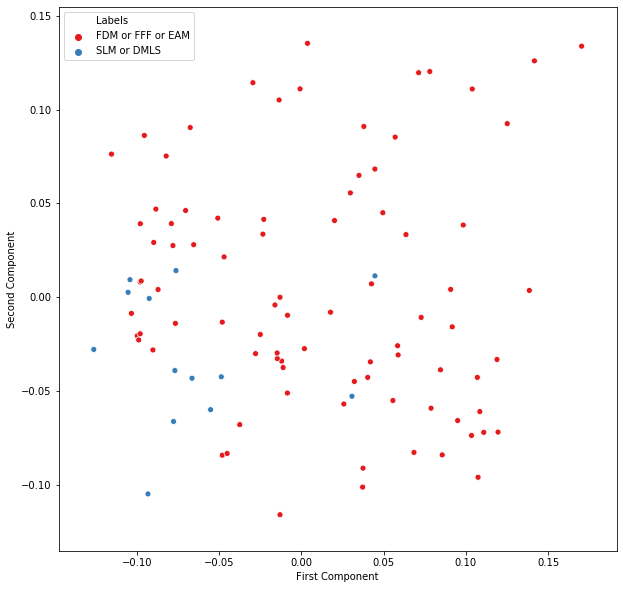

In [33]:
a_pro = visu_pro(tfidf_words_abstract)

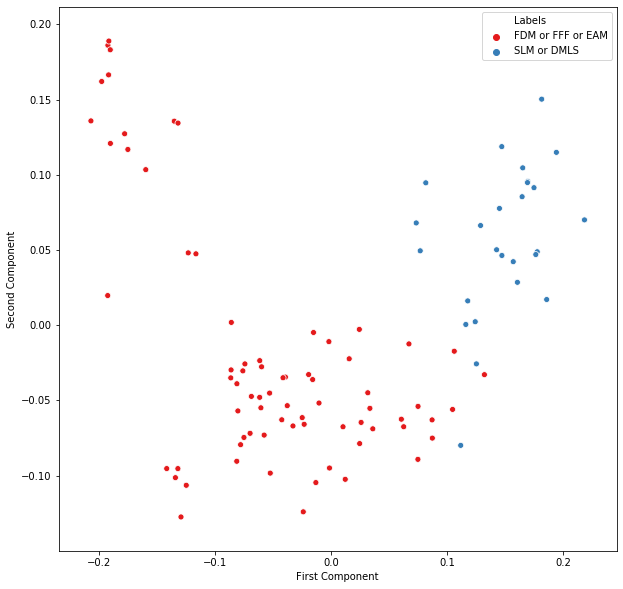

In [34]:
t_pro = visu_pro(tfidf_words_title)

In [35]:
def visu_mat(doc):
    
    X= []

    for text in doc:
        X.append(ft_model.get_sentence_vector(text))

    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    pca_df = pd.DataFrame(index=title_list,columns=['First Component','Second Component'],data=X_reduced)
    
    if doc == tfidf_words_abstract:
        pca_df["Labels"] = df_abs["Abs_Material"].values
    else :
        pca_df["Labels"] = df_title["Title_Material"].values

    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.scatterplot(x=pca_df['First Component'],y=pca_df['Second Component'],hue=pca_df['Labels'],palette ='Set1')
    
    return pca_df

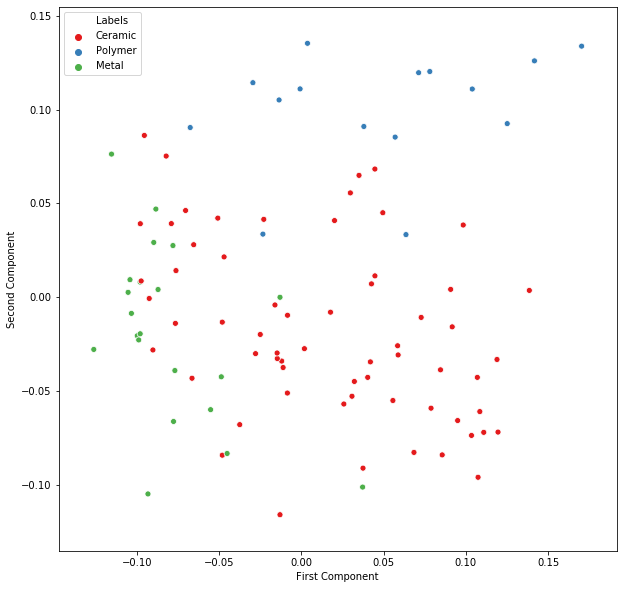

In [36]:
a_mat = visu_mat(tfidf_words_abstract)

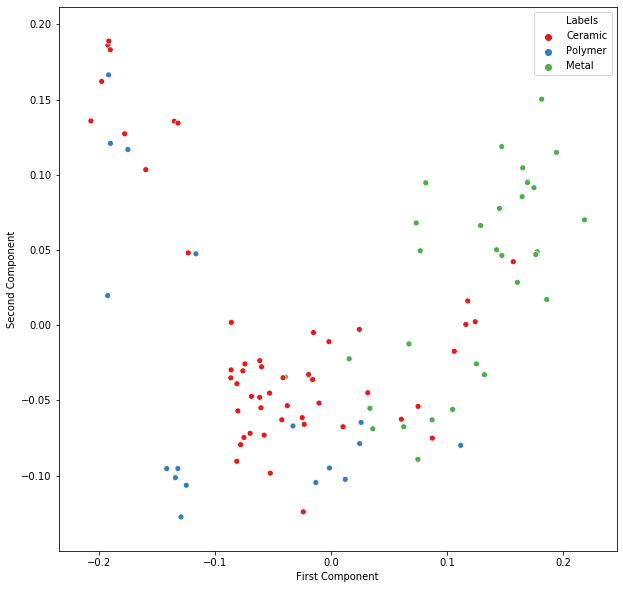

In [37]:
t_mat = visu_mat(tfidf_words_title)

In [38]:
cxvcxvxc

NameError: name 'cxvcxvxc' is not defined

In [ ]:
new_df = pd.DataFrame(dict(Titles=title_list,Abstracts=pdf_list))

new_df["ABS_PRO"] = df_abs["Abs_Production"]
new_df["TITLE_PRO"] = df_title["Title_Production"]

new_df["ABS_MATERIAL"] = df_abs["Abs_Material"]
new_df["TITLE_MATERIAL"] = df_title["Title_Material"]

In [ ]:
new_df.head()

In [ ]:
new_df[new_df.ABS_PRO!=new_df.TITLE_PRO].shape

In [ ]:
new_df[new_df.ABS_MATERIAL!=new_df.TITLE_MATERIAL].shape

In [ ]:
new_df["Titles"][27]

In [ ]:
df_abs.iloc[27]

In [ ]:
df_title.iloc[27]

In [ ]:
####################################################################################

In [ ]:
new_df["Titles"][25]

In [ ]:
df_abs.iloc[25]

In [ ]:
df_title.iloc[25]

In [ ]:
####################################################################################

In [ ]:
new_df["Titles"][46]

In [ ]:
df_abs.iloc[46]

In [ ]:
df_title.iloc[46]

In [ ]:
new_df[(new_df.ABS_MATERIAL!=new_df.TITLE_MATERIAL)&(new_df.ABS_PRO!=new_df.TITLE_PRO)]

In [ ]:
new_df["Titles"][38]

In [ ]:
df_abs.iloc[38]

In [ ]:
df_title.iloc[38]

In [ ]:
####################################################################################

In [ ]:
new_df["Titles"][75]

In [ ]:
df_abs.iloc[75]

In [ ]:
df_title.iloc[75]

In [ ]:
# def vis_docs(abs_n,title_n,doc_type): # Tuple , number, number, list
    
#     # Tfidf for abstracts
#     vec_abs = TfidfVectorizer(max_df=0.9,min_df=2,stop_words='english',max_features=100,ngram_range=(1,2))
#     vec_abs.fit(pdfs)

#     # Tfidf for titles
#     vec_title = TfidfVectorizer(max_df=0.9,min_df=2,stop_words='english',max_features=100,ngram_range=(1,2))
#     vec_title.fit(titles)
    
#     tfidf_words_abstract = []

#     for abstract in pdfs:
#         tfidf_words_abstract.append(" ".join(find_top_n(abstract,vec_abs,abs_n)))

#     tfidf_words_title = []

#     for title in titles:
#         tfidf_words_title.append(" ".join(find_top_n(title,vec_title,title_n)))
        
#     abs_production , abs_production_cos_score = pro_labeling(tfidf_words_abstract)
#     abs_material , abs_material_cos_score = mat_labeling(tfidf_words_abstract)
#     df_abs = create_df_abs()

#     title_production , title_production_cos_score = pro_labeling(tfidf_words_title)
#     title_material , title_material_cos_score = mat_labeling(tfidf_words_title)
#     df_title = create_df_title()
    
#     X= []

#     for text in doc_type:
#         X.append(ft_model.get_sentence_vector(text))

#     pca = PCA(n_components=2)
#     X_reduced = pca.fit_transform(X)

#     pca_df = pd.DataFrame(index=title_list,columns=['First Component','Second Component'],data=X_reduced)
#     pca_df["Labels"] = df_title["Title_Material"].values
    
#     fig, ax = plt.subplots(figsize=(10,10))
#     ax = sns.scatterplot(x=pca_df['First Component'],y=pca_df['Second Component'],hue=pca_df['Labels'],palette ='Set1')
    
#     return df_abs , df_title 

In [ ]:
# df_abs , df_title = vis_docs(abs_n=20,title_n=10,doc_type=tfidf_words_abstract)

In [ ]:
# df_2 = df_2.drop('que',axis=1)

In [ ]:
# def que(x):
#     if x['Material_title'] == x['Material_abstract']:
#         return True
#     else:
#         return False
    
# df_2['que'] = df_2.apply(que, axis=1)

In [ ]:
# df_2['que'].apply(lambda x:"x['que']" ,if x =="Ceramic",axis=1)

In [ ]:
# sum(df_2['que'])

In [ ]:
# df_2 = df_2[['Titles','Abstracts','Material_abstract','Material_abstract_score','Material_title','Material_title_score','que']]

In [ ]:
# df_2 = df_2.drop(['que'],axis=1)

In [ ]:
# df_2.to_excel("recent_results.xlsx")

In [ ]:
# def r(x):
#     return round(x,2)

# df_2["Material_title_score"] = df_2["Material_title_score"].apply(lambda x:round(x,2))
# df_2["Production_title_score"] = df_2["Production_title_score"].apply(lambda x:round(x,2))

In [ ]:
# temizlemeden bakilabilri aynimi diye
# yuksek olan abs ve titledan birseltirielbilir
# tfidf word sayilariyla oynanabilir

# https://www.datacamp.com/community/tutorials/stemming-lemmatization-python